In [3]:
from IPython.display import Image
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# K-MEANS

![DataSet](./k_means.png)

In [4]:
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

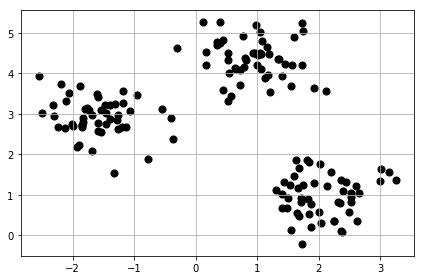

In [5]:
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.savefig('./spheres.png', dpi=300)
plt.show()

In [6]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [7]:
y_km[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0])

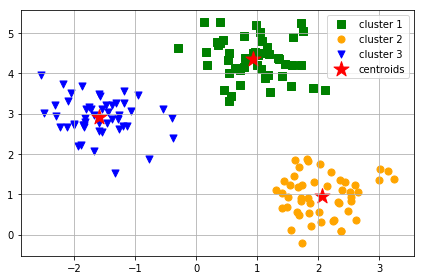

In [8]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

## Using the elbow method to find the optimal number of clusters

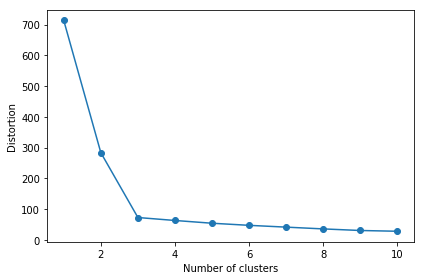

In [9]:
distortions = []
for i in range(1, 11):
    elbow_km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    elbow_km.fit(X)
    distortions.append(elbow_km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

## Comparison to "bad" clustering:

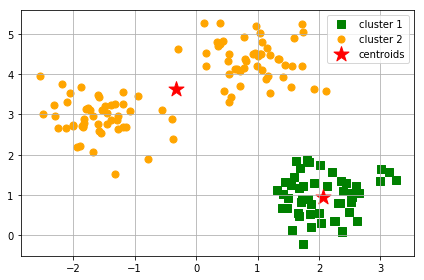

In [10]:
bad_km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
bad_y_km = bad_km.fit_predict(X)

plt.scatter(X[bad_y_km == 0, 0],
            X[bad_y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(X[bad_y_km == 1, 0],
            X[bad_y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(bad_km.cluster_centers_[:, 0], bad_km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids_bad.png', dpi=300)
plt.show()

# DBSCAN

![DataSet](./dbscan.png)

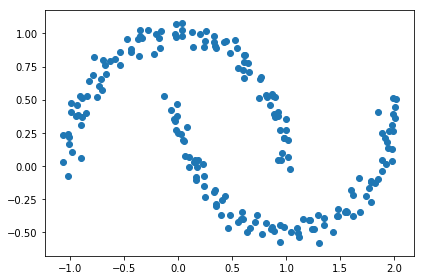

In [11]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

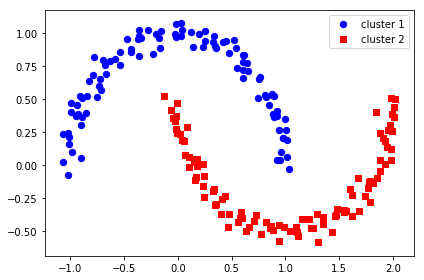

In [12]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='blue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

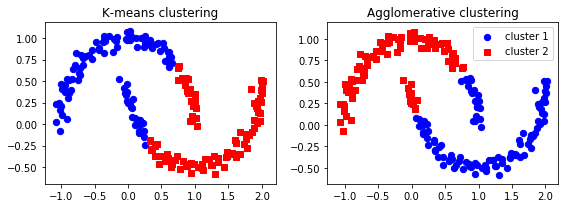

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

#K-means Clustering
moon_km = KMeans(n_clusters=2, random_state=0)
moon_y_km = moon_km.fit_predict(X)
ax1.scatter(X[moon_y_km == 0, 0], X[moon_y_km == 0, 1],
            c='blue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[moon_y_km == 1, 0], X[moon_y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

#Hierarchycal Clustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='blue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

# Outlier Detecting using DBSCAN

# Exercise 1
## No Outlier

In [14]:
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

In [15]:
db = DBSCAN(eps=0.7, min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)

In [16]:
y_db[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1], dtype=int64)

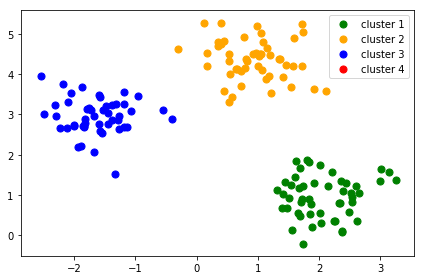

In [17]:
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            s=50,
            c='green',
            marker='o',
            label='cluster 1')

plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_db == 2, 0],
            X[y_db == 2, 1],
            s=50,
            c='blue',
            marker='o',
            label='cluster 3')

plt.scatter(X[y_db == 3, 0],
            X[y_db == 3, 1],
            s=50,
            c='red',
            marker='o',
            label='cluster 4')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

# Exercise 2
## Bad Clustering

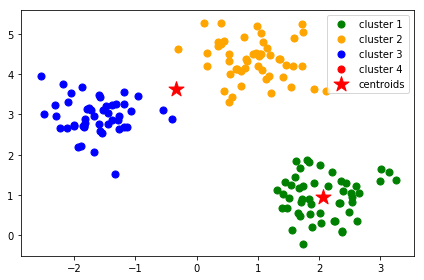

In [20]:
bad_db = DBSCAN(eps=0.7, min_samples=5,metric='euclidean')
bad_y_db = db.fit_predict(X)

plt.scatter(X[bad_y_db == 0, 0],
            X[bad_y_db == 0, 1],
            s=50,
            c='green',
            marker='o',
            label='cluster 1')

plt.scatter(X[bad_y_db == 1, 0],
            X[bad_y_db == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[bad_y_db == 2, 0],
            X[bad_y_db == 2, 1],
            s=50,
            c='blue',
            marker='o',
            label='cluster 3')

plt.scatter(X[bad_y_db == 3, 0],
            X[bad_y_db == 3, 1],
            s=50,
            c='red',
            marker='o',
            label='cluster 4')


plt.scatter(bad_km.cluster_centers_[:, 0], bad_km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/centroids_bad.png', dpi=300)
plt.show()

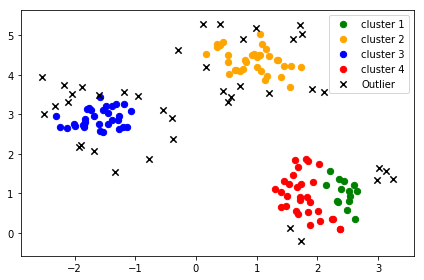

In [15]:
# Make a Plot

# Exercise 3
## There are few outlier but they have 4 clusters

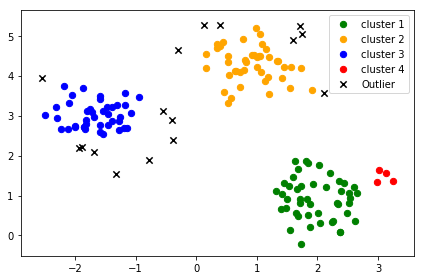

In [16]:
# Make a Plot

# Exercise 4
## There are few outlier

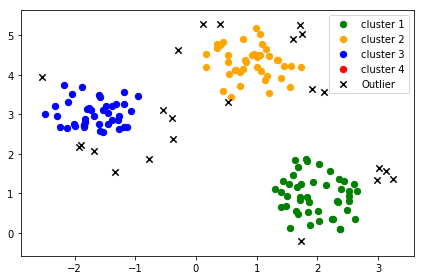

In [17]:
# Make a Plot